In [13]:
# import common lib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# import classifier
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

from models import *

In [14]:
# active seaborn theme for matplotlib
sns.set_theme()

In [15]:
# 
# %run -i "install.ipynb" capture_output=False
# %run -i "preprocessing.ipynb" capture_output=False

In [16]:
data = pd.read_csv('./open-meteo.clean.csv')

In [17]:
data_len = len(data[data.columns[0]])
feature_len = data.columns.size - 1

print(data_len)
print(feature_len)

9373
49


3. Train

In [18]:
target = data['weather_code']
X = data.drop("weather_code", axis=1)
feature_names = data.columns.array
feature_names = feature_names[1:]

#target.drop(index=0,axis=0)
#X.drop(index=(len(X)-1), axis=0)

le = LabelEncoder()
y = le.fit_transform(target)

y_index = np.array(list(set(y)))
y_label = le.inverse_transform(y_index)
y_label = [str(item).zfill(2) for item in y_label]

print(y_index)
print(y_label)

[0 1 2 3 4 5 6 7 8 9]
['00', '01', '02', '03', '51', '53', '55', '61', '63', '65']


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

mm_scaler = MinMaxScaler()
st_scaler = StandardScaler()

# scaler fit và transform trên tập train
X_train_mm = mm_scaler.fit_transform(X_train)
X_train_st = st_scaler.fit_transform(X_train)

# scaler chỉ transform trên tập test, không được fit
X_test_mm = mm_scaler.transform(X_test)
X_test_st = st_scaler.transform(X_test)


4. Evaluate

In [20]:
from models import *

In [21]:
def display_confusion_matrix(Clf, y_label):
    fig, axs = plt.subplots(1, 3, figsize=(16, 4))

    axs[0].set_title("no scaling")
    Clf[0].confusion_matrix(axs[0], y_label)

    axs[1].set_title("Min-Max Scaling")
    Clf[1].confusion_matrix(axs[1], y_label)

    axs[2].set_title("Standardization")
    Clf[2].confusion_matrix(axs[2], y_label)

    # Adjust layout to prevent overlapping titles/labels
    plt.tight_layout()

    # Display the figure with subplots
    plt.show()

In [22]:
final_score = []

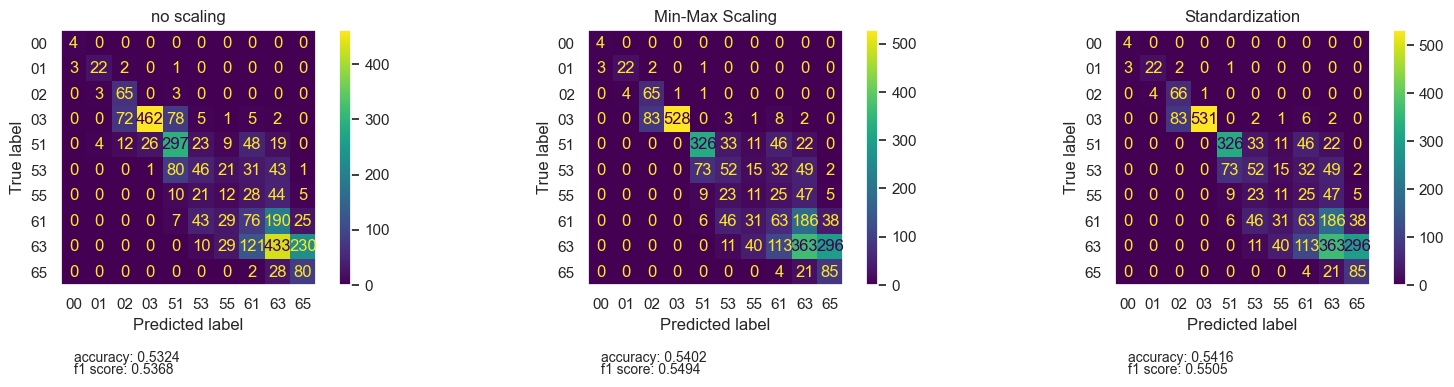

In [23]:
nb_score = []

nb1 = My_NaiveBayes(X_train, X_test, y_train, y_test)
nb_score.append(nb1.forward())

nb2 = My_NaiveBayes(X_train_mm, X_test_mm, y_train, y_test)
nb_score.append(nb2.forward())

nb3 = My_NaiveBayes(X_train_st, X_test_st, y_train, y_test)
nb_score.append(nb3.forward())

final_score.append(nb_score)
display_confusion_matrix([nb1, nb2, nb3], y_label)

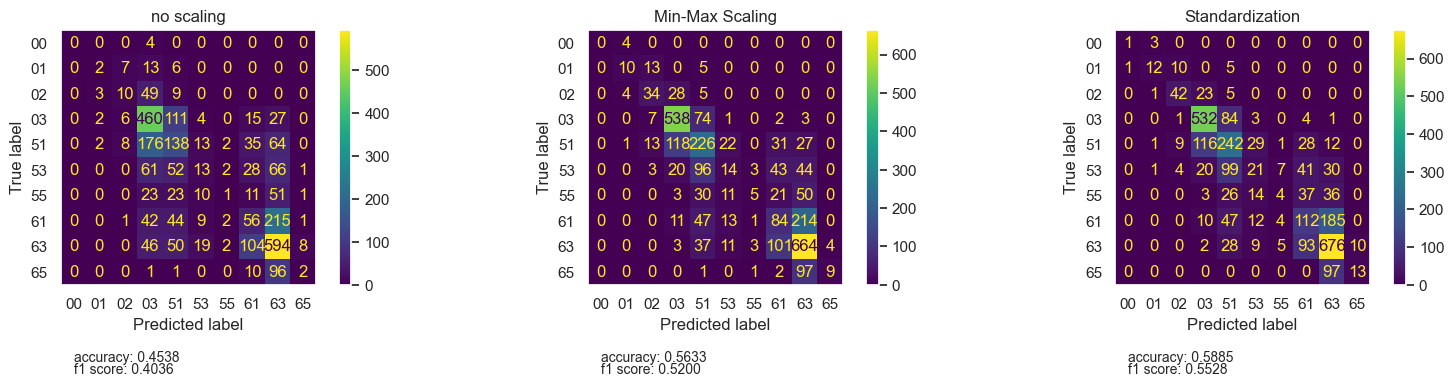

In [24]:
knn_score = []

knn1 = My_KNN(X_train, X_test, y_train, y_test)
knn_score.append(knn1.forward())

knn2 = My_KNN(X_train_mm, X_test_mm, y_train, y_test)
knn_score.append(knn2.forward())

knn3 = My_KNN(X_train_st, X_test_st, y_train, y_test)
knn_score.append(knn3.forward())

final_score.append(knn_score)
display_confusion_matrix([knn1, knn2, knn3], y_label)

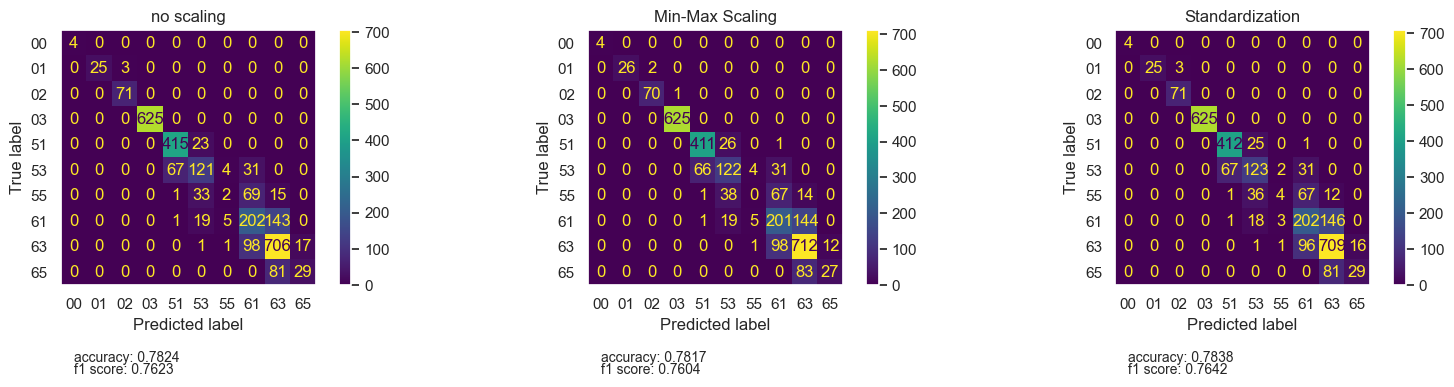

In [25]:
rdf_score = []

rdf1 = My_RDF(X_train, X_test, y_train, y_test)
rdf_score.append(rdf1.forward())

rdf2 = My_RDF(X_train_mm, X_test_mm, y_train, y_test)
rdf_score.append(rdf2.forward())

rdf3 = My_RDF(X_train_st, X_test_st, y_train, y_test)
rdf_score.append(rdf3.forward())

final_score.append(rdf_score)
display_confusion_matrix([rdf1, rdf2, rdf3], y_label)

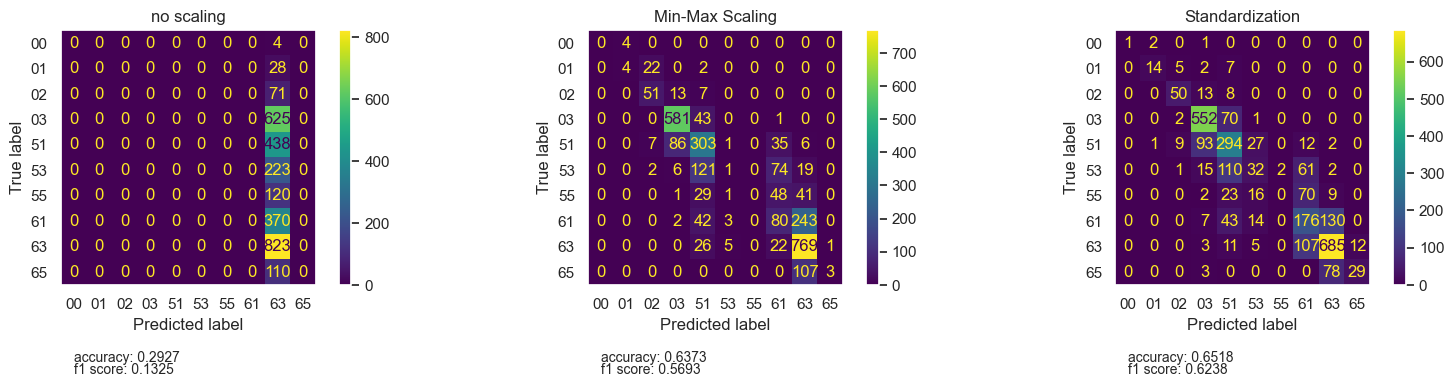

In [26]:
svm_score = []

svm1 = My_SVM(X_train, X_test, y_train, y_test)
svm_score.append(svm1.forward())

svm2 = My_SVM(X_train_mm, X_test_mm, y_train, y_test)
svm_score.append(svm2.forward())

svm3 = My_SVM(X_train_st, X_test_st, y_train, y_test)
svm_score.append(svm3.forward())

final_score.append(svm_score)
display_confusion_matrix([svm1, svm2, svm3], y_label)

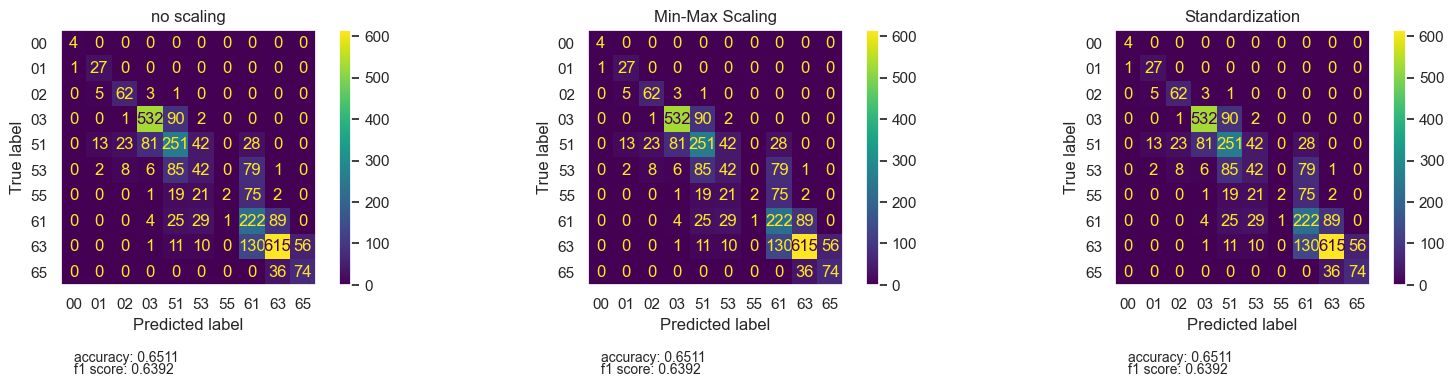

In [27]:
lda_score = []

lda1 = My_LDA(X_train, X_test, y_train, y_test)
lda_score.append(lda1.forward())

lda2 = My_LDA(X_train_mm, X_test_mm, y_train, y_test)
lda_score.append(lda2.forward())

lda3 = My_LDA(X_train_st, X_test_st, y_train, y_test)
lda_score.append(lda3.forward())

final_score.append(lda_score)
display_confusion_matrix([lda1, lda2, lda3], y_label)

e:\GitHub\weather_analysis\.venv\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
e:\GitHub\weather_analysis\.venv\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
e:\GitHub\weather_analysis\.venv\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
e:\GitHub\weather_analysis\.venv\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 3 is not full rank. Increasing the value of parameter `reg_param` might help reducing the col

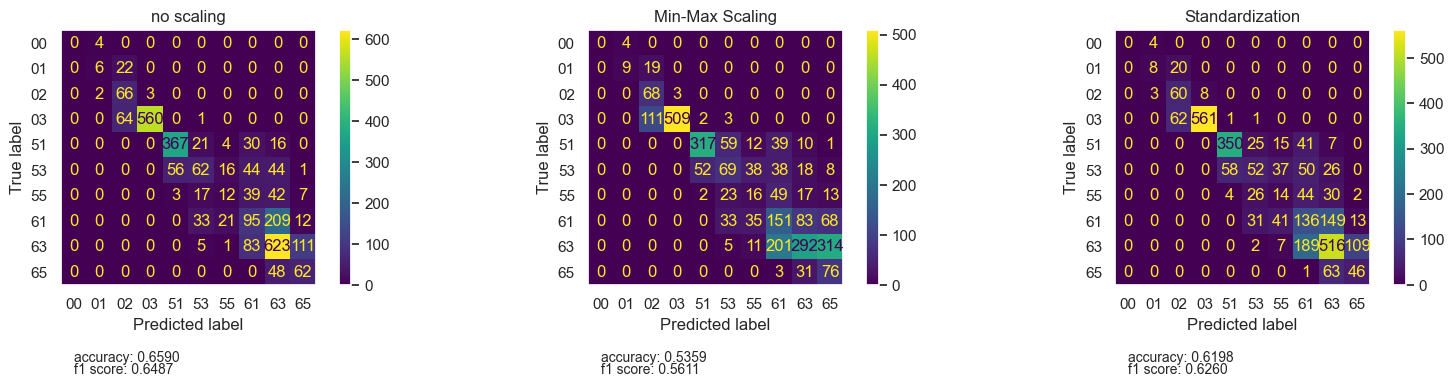

In [28]:
qda_score = []

qda1 = My_QDA(X_train, X_test, y_train, y_test)
qda_score.append(qda1.forward())

qda2 = My_QDA(X_train_mm, X_test_mm, y_train, y_test)
qda_score.append(qda2.forward())

qda3 = My_QDA(X_train_st, X_test_st, y_train, y_test)
qda_score.append(qda3.forward())

final_score.append(qda_score)
display_confusion_matrix([qda1, qda2, qda3], y_label)

e:\GitHub\weather_analysis\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:38:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
e:\GitHub\weather_analysis\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:38:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
e:\GitHub\weather_analysis\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:38:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


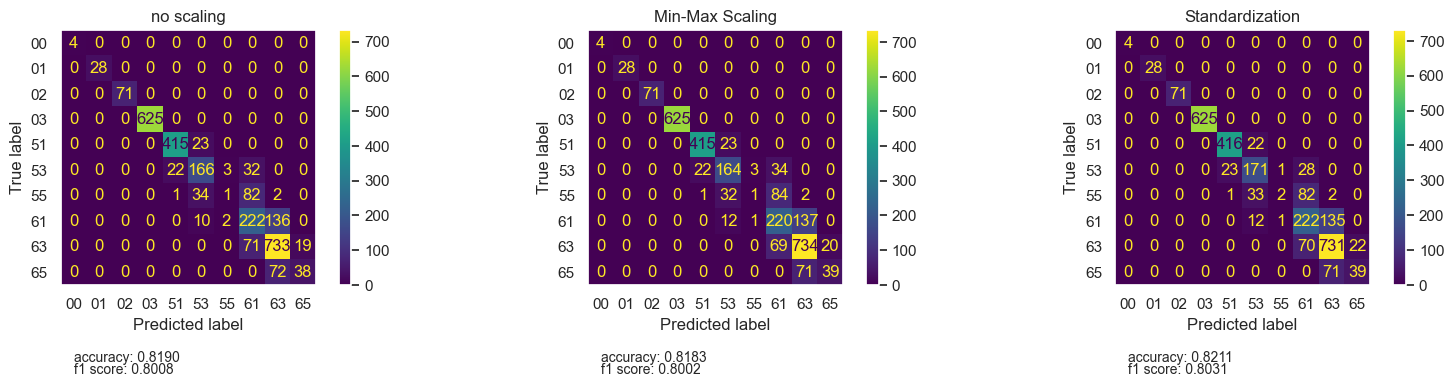

In [29]:
xgb_score = []

xgb1 = My_XGB(X_train, X_test, y_train, y_test)
xgb_score.append(xgb1.forward())

xgb2 = My_XGB(X_train_mm, X_test_mm, y_train, y_test)
xgb_score.append(xgb2.forward())

xgb3 = My_XGB(X_train_st, X_test_st, y_train, y_test)
xgb_score.append(xgb3.forward())

final_score.append(xgb_score)
display_confusion_matrix([xgb1, xgb2, xgb3], y_label)

Nhận xét:
- Confusion Matrix lý tưởng là 1 ma trận đường chéo
- 1 số thuật toán phụ thuộc rất lớn vào scaling chẳng hạn Kernel SVM
- 1 số thuật toán không cần scaling vẫn cho ra kết quả tương đối tốt chẳng hạn random forest, XGBoost

In [30]:
np_score = np.array(final_score)
print(np_score.shape)

(7, 3, 2)


In [31]:
bar_width = 0.1
index = np.arange(len(np_score))

bar1_positions = index - bar_width * 1.5
bar2_positions = index - bar_width * 0.5
bar3_positions = index + bar_width * 0.5

categories = ["Gaussian Naive Bayes", "K-Nearest Neighbors", "Random Forest", "Kernel SVM", "LDA", "QDA", "XGBoost"]

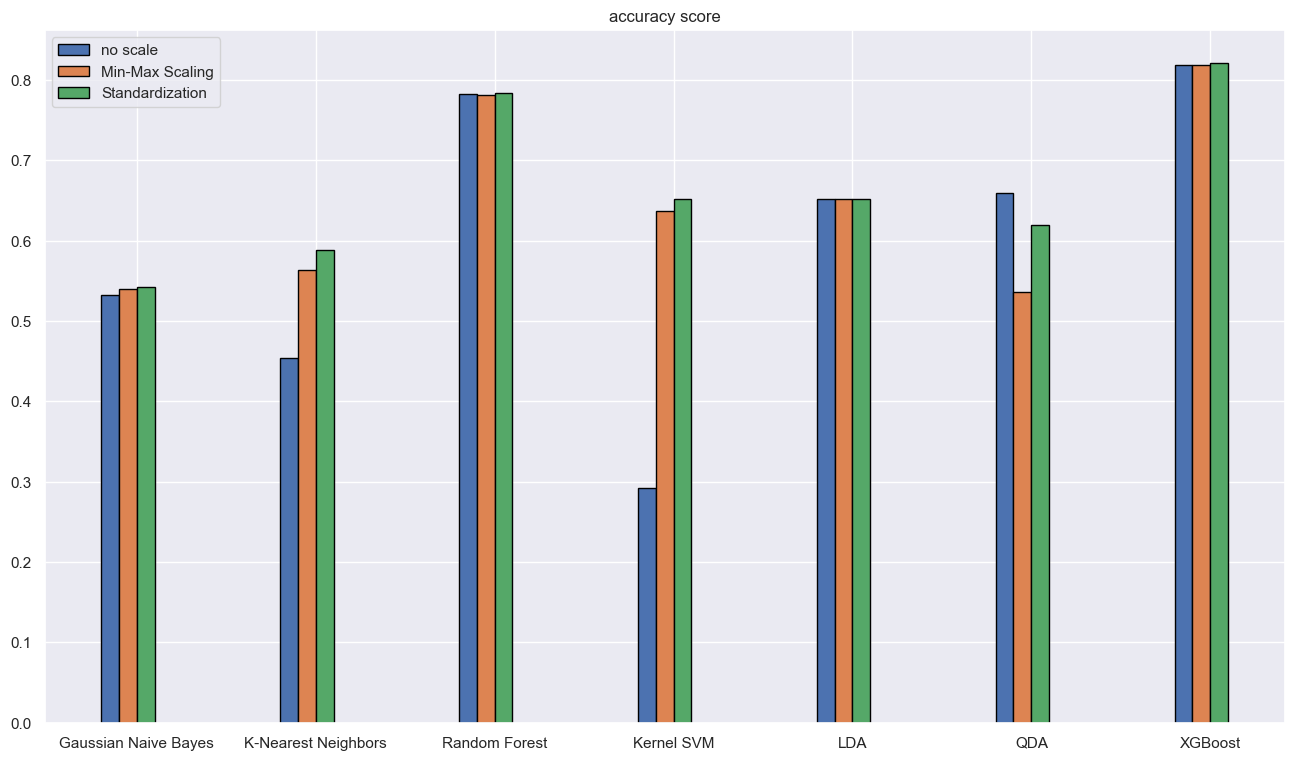

In [32]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.bar(bar1_positions, np_score[:,0,0], label="no scale", width=bar_width, edgecolor='black')
ax.bar(bar2_positions, np_score[:,1,0], label="Min-Max Scaling", width=bar_width, edgecolor='black')
ax.bar(bar3_positions, np_score[:,2,0], label="Standardization", width=bar_width, edgecolor='black')

ax.set_xticks(index)              # Set x-tick locations to the center of the grouped bars
ax.set_xticklabels(categories)    # Set x-tick labels

plt.title("accuracy score")
plt.legend()
plt.show()

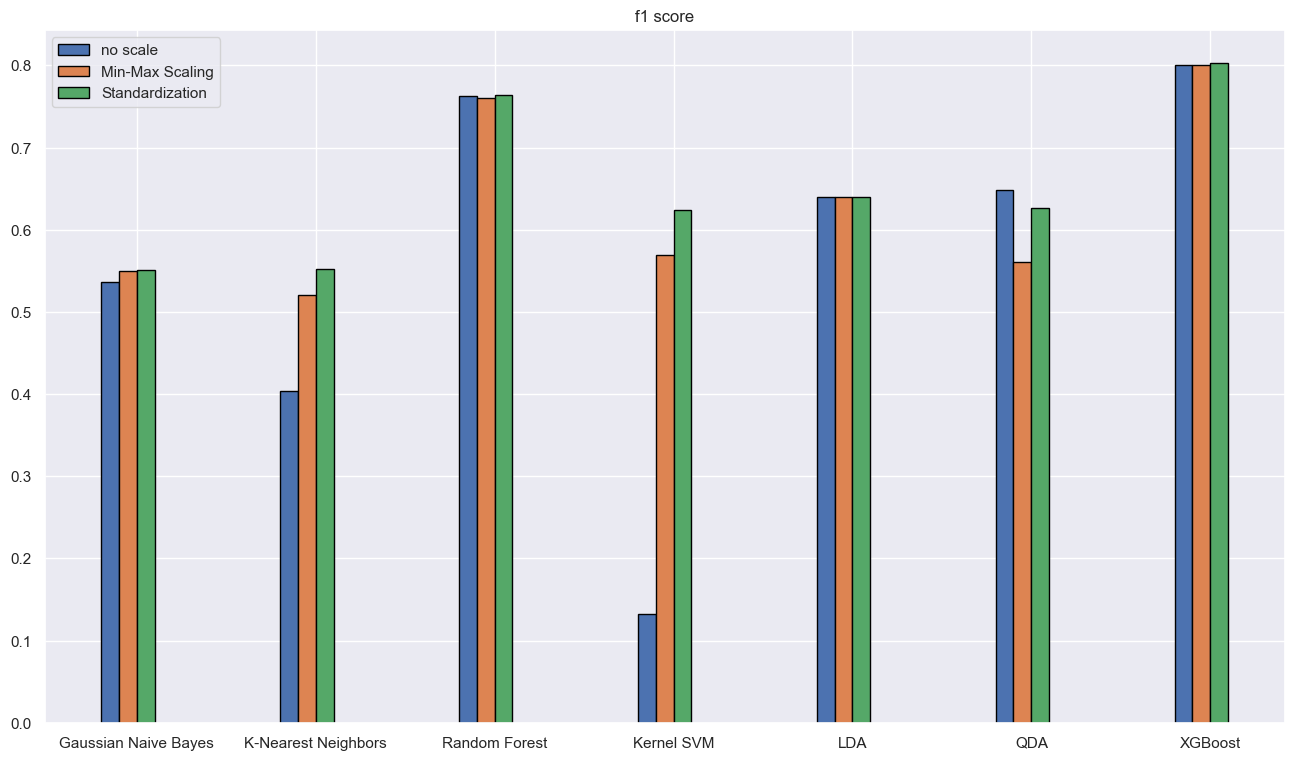

In [33]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.bar(bar1_positions, np_score[:,0,1], label="no scale", width=bar_width, edgecolor='black')
ax.bar(bar2_positions, np_score[:,1,1], label="Min-Max Scaling", width=bar_width, edgecolor='black')
ax.bar(bar3_positions, np_score[:,2,1], label="Standardization", width=bar_width, edgecolor='black')

ax.set_xticks(index) # Set x-tick locations to the center of the grouped bars
ax.set_xticklabels(categories) # Set x-tick labels

plt.title("f1 score")
plt.legend()
plt.show()

Nhận xét:
- XGBoost cho kết quả tốt nhất, tiếp đến là Random Forest
- 2 thuật toán này đều không phụ thuộc vào Scaling